In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data_loading
import solver_create_front
import utils
import return_estimation
import portfolio_visualization

In [2]:
companies = data_loading.load_all_companies_from_dir("./data/Bundle2")

The predictions were obtained using direct autoregressive trees. The code is in `create_forecasters.py`. It isn't run here, because the training and inference take a significant amount of time, and the models altogether take up over 4GB of space, making them impossible to send

In [3]:
for company in companies:
    csv_path = f"./saved_forecasts/bundle2/{company.name}.csv"
    company.expected_return = (return_estimation.expected_return_from_csv(csv_path, 300) / company.prices[-1]) - 1

In [4]:
ec_sol = solver_create_front.uniformly_search_threshold_space(companies, 100, 300, calculate_expected_return=False)
ec_arrays = [np.array(x[1]['x']) for x in ec_sol]
ec_points = [(utils.portfolio_expected_return(companies, p)[0], utils.portfolio_risk(companies, p)) for p in ec_arrays]

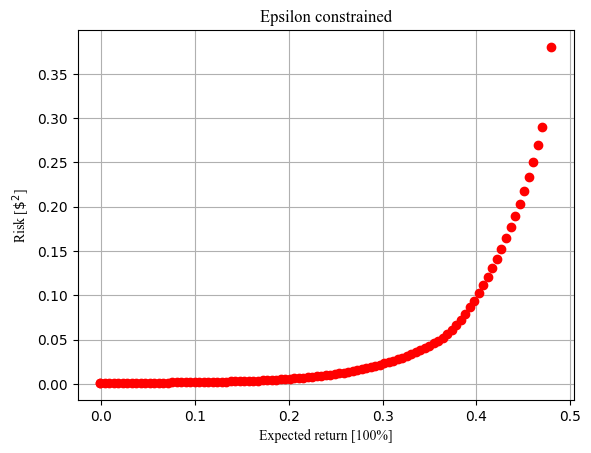

In [5]:
solver_create_front.plot_front(companies, ec_sol, title="Epsilon constrained")

In [6]:
print(f"\tExpected return\t  Risk\t\tRatio\t\tNum companies")
for i, solution in enumerate(ec_sol):
    expected_return = utils.portfolio_expected_return(companies, solution[1]['x'])
    risk = utils.portfolio_risk(companies, solution[1]['x'])
    included_companies = utils.portfolio_num_included_companies(solution[1]['x'])
    print(f"{i:2}. {np.round(expected_return, 3):16}\t{np.round(risk, 4):8}\t{np.round(expected_return/risk, 3):8}\t{included_companies}")

	Expected return	  Risk		Ratio		Num companies
 0.           -0.001	  0.0012	  -0.779	12
 1.           -0.001	  0.0012	  -0.574	12
 2.            0.004	  0.0012	   3.214	12
 3.            0.009	  0.0012	   7.161	12
 4.            0.013	  0.0012	  11.032	12
 5.            0.018	  0.0012	  14.786	12
 6.            0.023	  0.0013	  18.389	12
 7.            0.028	  0.0013	  21.812	13
 8.            0.033	  0.0013	  25.033	12
 9.            0.038	  0.0013	  28.031	13
10.            0.042	  0.0014	  30.814	13
11.            0.047	  0.0014	  33.401	13
12.            0.052	  0.0015	  35.795	13
13.            0.057	  0.0015	  38.001	13
14.            0.062	  0.0015	  40.023	13
15.            0.066	  0.0016	  41.865	13
16.            0.071	  0.0016	  43.531	12
17.            0.076	  0.0017	  45.029	12
18.            0.081	  0.0017	  46.367	12
19.            0.086	  0.0018	  47.554	11
20.             0.09	  0.0019	  48.566	12
21.            0.095	  0.0019	   49.36	10
22.              0.1	   0.002	

In [7]:
chosen_idx =  70
chosen_min_ret, chosen_solution = ec_sol[chosen_idx]

In [8]:
expected_return = utils.portfolio_expected_return(companies, chosen_solution['x'])
risk = utils.portfolio_risk(companies, chosen_solution['x'])
included_companies = utils.portfolio_num_included_companies(chosen_solution['x'])
print(f"{chosen_idx:2}. {np.round(expected_return, 3):16}\t{np.round(risk, 4):8}\t{np.round(expected_return/risk, 3):8}\t{included_companies}")

70.            0.331	  0.0338	    9.79	6


In [9]:
# pp_idx = 4
# LASERS_IDX = 8

In [10]:
ordered_weights = utils.weights_in_valid_order(companies, chosen_solution['x'])
# print("Min expected return:", chosen_min_ret)
for company_name, weight in zip(utils.COMPANY_ORDER, ordered_weights):
    print(f"{company_name:19}", np.round(weight, 2))

SuperFuture         0.0
Apples              0.0
WorldNow            0.0
Electronics123      0.0
Photons             0.0
SpaceNow            0.0
PearPear            0.04
PositiveCorrelation 0.0
BetterTechnology    0.0
ABCDE               0.0
EnviroLike          0.0
Moneymakers         0.0
Fuel4               0.0
MarsProject         0.19
CPU-XYZ             0.04
RoboticsX           0.0
Lasers              0.44
WaterForce          0.0
SafeAndCare         0.04
BetterTomorrow      0.25


In [11]:
for i, (min_ret, sol) in enumerate(ec_sol):
    pear_pear_share =  sol['x'][4]
    lasers_share = sol['x'][8]
    if pear_pear_share < 0.1 and lasers_share < 0.3:
        print(i, pear_pear_share, lasers_share)

82 2.5780674108695132e-08 0.28201632418566125
83 2.2431033607753592e-08 0.25834099173277414
84 2.335916620759584e-08 0.2346656293014513
85 2.0166355235842948e-08 0.21099031236212554
86 1.559286487988364e-08 0.18731502038660308
87 1.1139096360549569e-08 0.16363973862112846
88 7.2843554057918955e-09 0.13996445947993744
89 4.088388424188223e-09 0.1162891771047752
90 2.0688539273904667e-09 0.09261387678677023
91 1.0930907118408185e-09 0.06893856215143833
92 1.2799536146890932e-09 0.04526323417866424
93 1.1610537258547836e-09 0.02158897304020256
94 2.237868778662171e-11 1.0799650046838804e-06
95 1.816361817485504e-09 1.8554373759138473e-06
96 9.20891359042006e-10 1.5953268013067474e-07
97 3.6885144523133796e-10 3.1467700486644765e-08
98 5.618367964150192e-10 3.62669648356994e-08
99 8.503480518719881e-10 4.3034529591696334e-08
100 5.534750719387954e-10 3.0196599338237763e-10


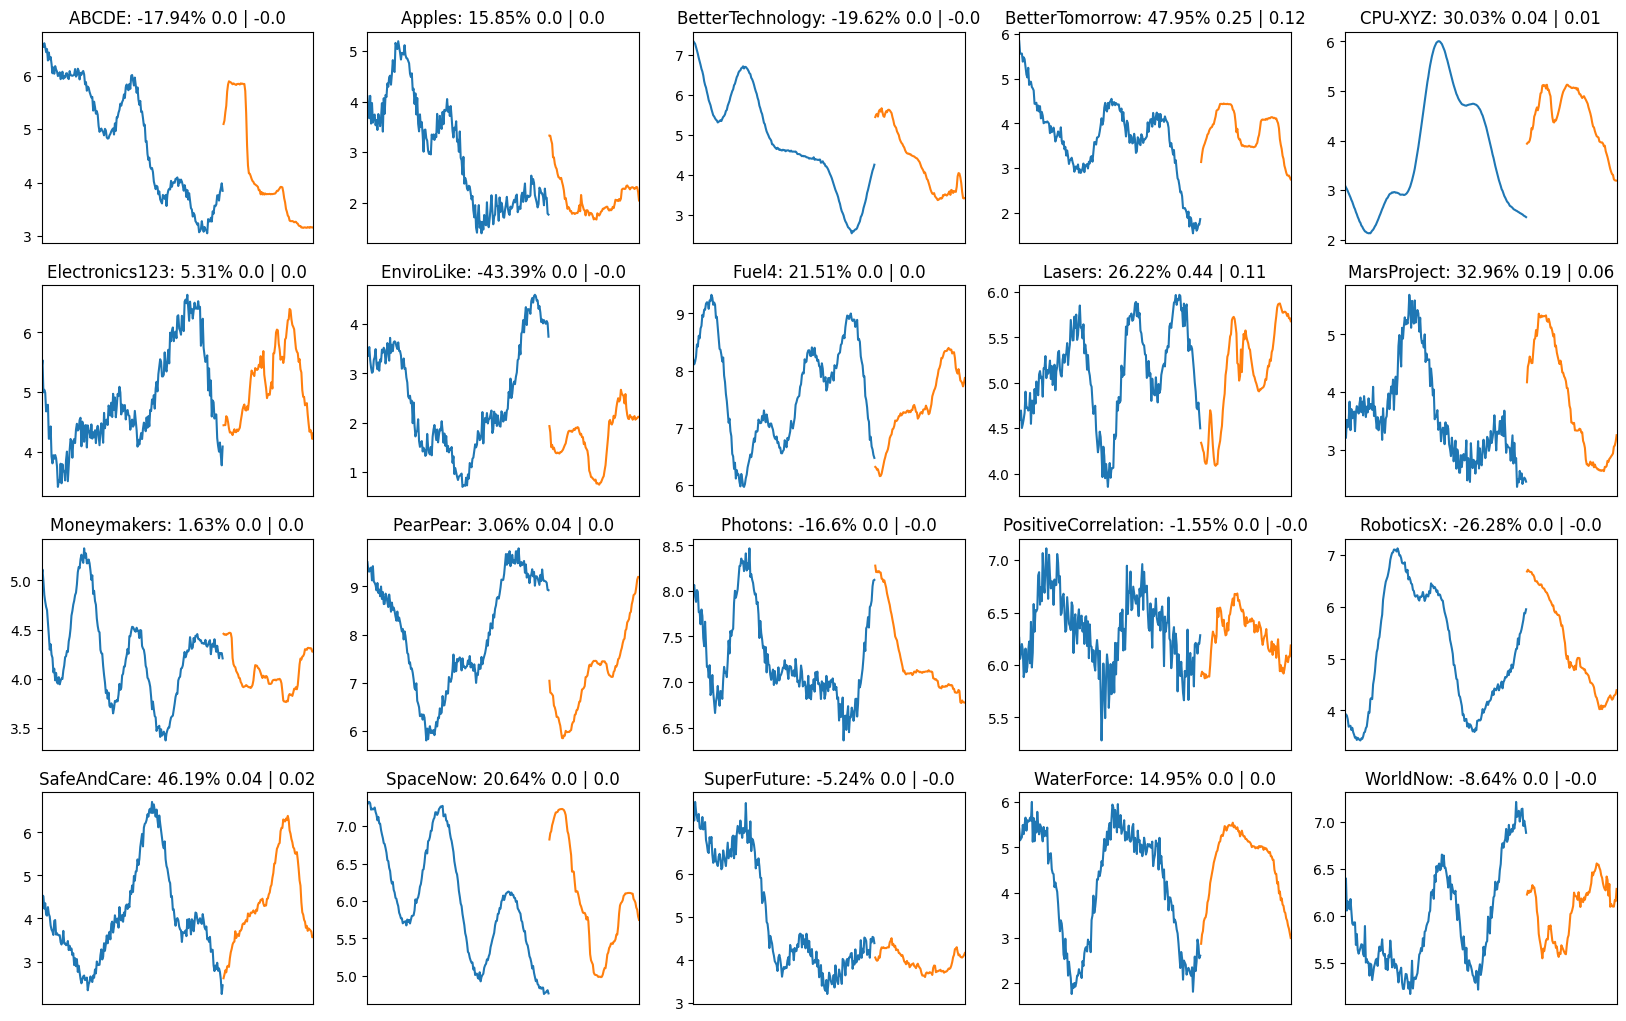

In [12]:
portfolio_visualization.vis_portfolio_from_csv_subplots(companies, 300, chosen_solution['x'], "./saved_forecasts/bundle2/")

I don't like some of the aspects of this solution, but after searching through many options, this seemed like the easiest to fix to match my preferences. The notes I made for myself, before running any models were:
Maybe buy:
- Apples -  cheap now, with potential to bounce back
- BetterTomorrow -  cheap now, with potential to bounce back
- CPU-XYZ - low, with much room to grow given its history
- WaterForce - near the bottom of its trend

DON'T BUY:
- ABCDE - consistently decreasing, still with room to fall
- PearPear - near its (very high) peak, likely to drop
- Photons - at a peak
- PositiveCorrelation - due to its cyclical nature, it is likely to end at a similar value
- WorldNow - at a peak

In [13]:
for i, c in enumerate(companies):
    print(i, c.name, chosen_solution['x'][i])

0 ABCDE 5.084451719099723e-10
1 Apples 1.2360238090515398e-08
2 BetterTechnology 4.075989202038595e-10
3 BetterTomorrow 0.24951398488026935
4 CPU-XYZ 0.03952549881693235
5 Electronics123 7.196027768264928e-10
6 EnviroLike 6.420654995738496e-10
7 Fuel4 1.4604311648615157e-09
8 Lasers 0.43621191661774184
9 MarsProject 0.19255223433042495
10 Moneymakers 2.3415195240721873e-09
11 PearPear 0.038781055473450676
12 Photons 8.355012284922961e-10
13 PositiveCorrelation 9.296603982036708e-10
14 RoboticsX 8.873371377847724e-10
15 SafeAndCare 0.04341528253642564
16 SpaceNow 1.2902775753707728e-09
17 SuperFuture 6.117513921548165e-10
18 WaterForce 7.581981476902557e-10
19 WorldNow 3.5921282093684238e-09


Here I make the changes to adjust the portfolio to be more similar to my preferences. I didn't make them too drastic, to not go against the spirit of the task (and to feel less bad if they turn out to be bad choices).

If less was at stake, I would remove all shares of PearPear, and reduce the contribution of Lasers even further, in favor of CPU-XYZ and WaterForce

In [14]:
modified_solution = np.array(chosen_solution['x'][:]).reshape(20,)
# transfer from Lasers to Apples
modified_solution[8] -= 0.05
modified_solution[1] += 0.05
# transfer from Lasers to WaterForce
modified_solution[8] -= 0.03
modified_solution[18] += 0.03
# transfer from PearPear to WaterForce
modified_solution[11] -= 0.02
modified_solution[18] += 0.02
modified_exp_ret = utils.portfolio_expected_return(companies, modified_solution)
modified_risk = utils.portfolio_risk(companies, modified_solution)
print(modified_exp_ret)
print(modified_risk)
print(np.sum(modified_solution))

0.32440908209734626
0.04520027417907429
1.0000000000000002


## Presenting the final solution

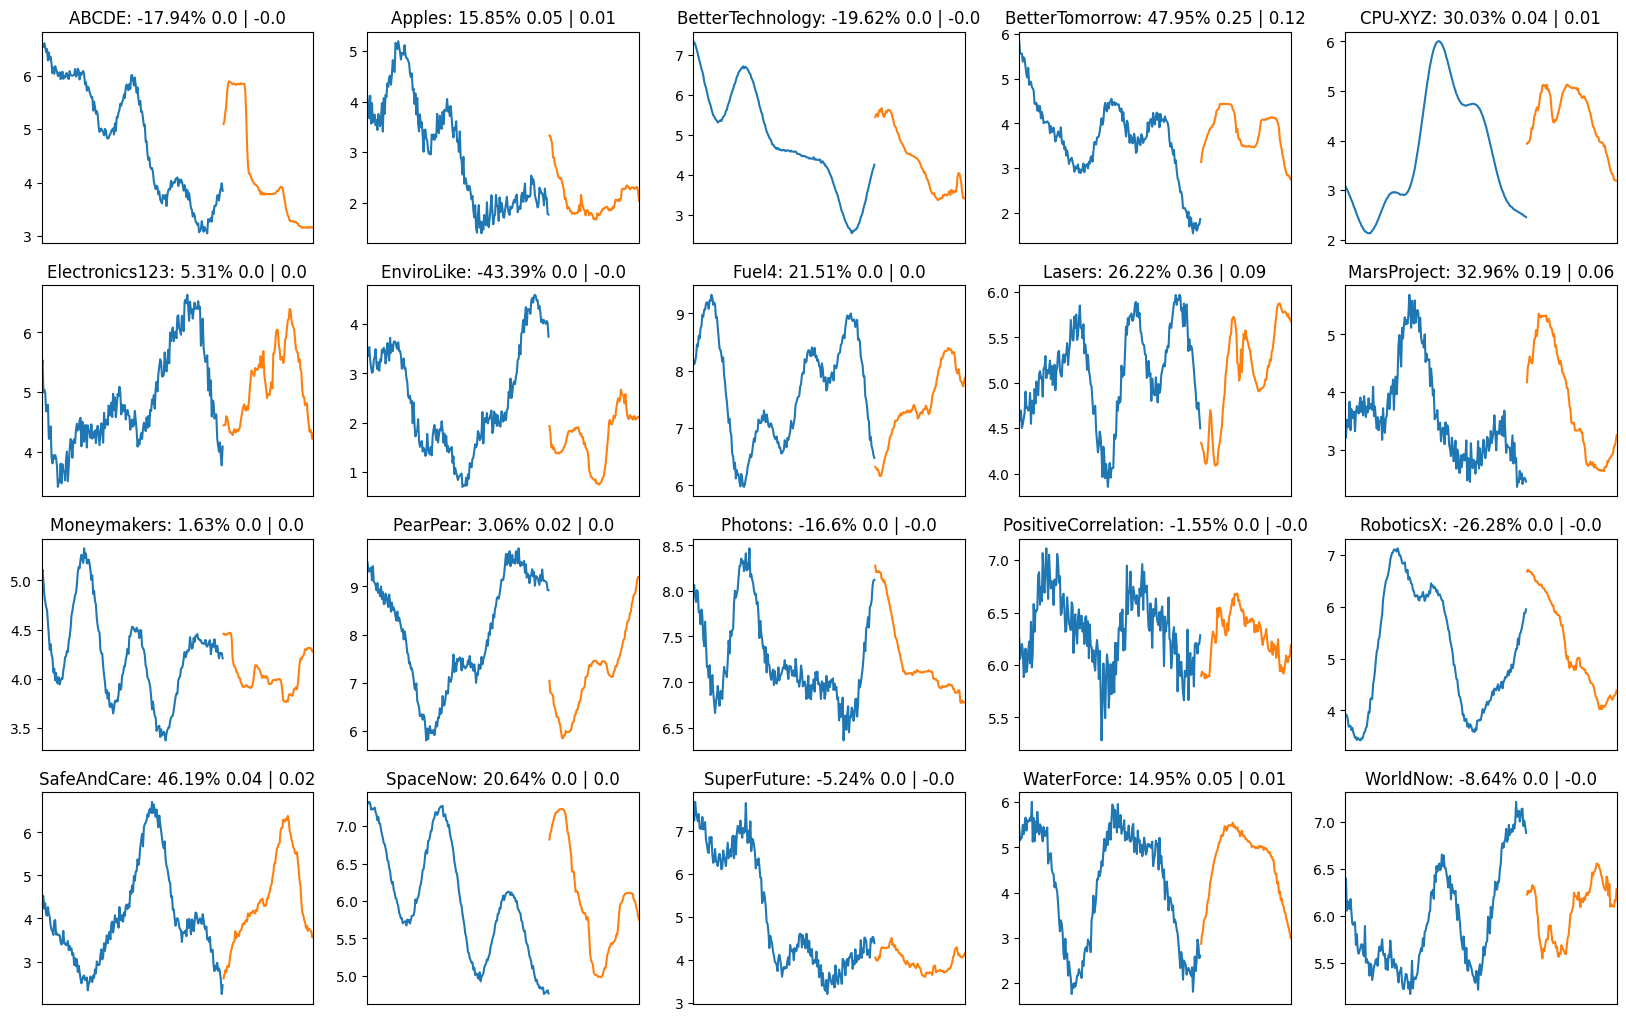

In [15]:
portfolio_visualization.vis_portfolio_from_csv_subplots(companies, 300, modified_solution, "./saved_forecasts/bundle2/", export_pdf=True, pdf_title="portfolio2.pdf")

In [16]:
ordered_modified_weights = utils.weights_in_valid_order(companies, modified_solution)
for company_name, weight in zip(utils.COMPANY_ORDER, ordered_modified_weights):
    print(f"{company_name:19}", np.round(weight, 5))

SuperFuture         0.0
Apples              0.05
WorldNow            0.0
Electronics123      0.0
Photons             0.0
SpaceNow            0.0
PearPear            0.01878
PositiveCorrelation 0.0
BetterTechnology    0.0
ABCDE               0.0
EnviroLike          0.0
Moneymakers         0.0
Fuel4               0.0
MarsProject         0.19255
CPU-XYZ             0.03953
RoboticsX           0.0
Lasers              0.35621
WaterForce          0.05
SafeAndCare         0.04342
BetterTomorrow      0.24951


Data for submission

In [17]:
print(modified_exp_ret, end=" ")
print(modified_risk, end = " ")
for weight in ordered_modified_weights:
    print(weight,  end=" ")

0.32440908209734626 0.04520027417907429 6.117513921548165e-10 0.05000001236023809 3.5921282093684238e-09 7.196027768264928e-10 8.355012284922961e-10 1.2902775753707728e-09 0.018781055473450676 9.296603982036708e-10 4.075989202038595e-10 5.084451719099723e-10 6.420654995738496e-10 2.3415195240721873e-09 1.4604311648615157e-09 0.19255223433042495 0.03952549881693235 8.873371377847724e-10 0.3562119166177419 0.050000000758198146 0.04341528253642564 0.24951398488026935 